In [25]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


In [68]:
#Data Loading and Exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import linregress
import datetime as dt
from sklearn.preprocessing import StandardScaler
import mplfinance as mpf

url = 'https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv'
df = pd.read_csv(url)

df.isnull().sum()
df.drop_duplicates()
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

print(df.head())
print(df.info())
print(df.describe())

                           volume    vwap    open   close    high     low  \
time                                                                        
2007-01-03 05:00:00  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250   
2007-01-04 05:00:00  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936   
2007-01-05 05:00:00  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143   
2007-01-08 05:00:00  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457   
2007-01-09 05:00:00  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411   

                     transactions  
time                               
2007-01-03 05:00:00        189737  
2007-01-04 05:00:00        136333  
2007-01-05 05:00:00        141050  
2007-01-08 05:00:00        130547  
2007-01-09 05:00:00        569578  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4159 entries, 2007-01-03 05:00:00 to 2023-07-12 04:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ----

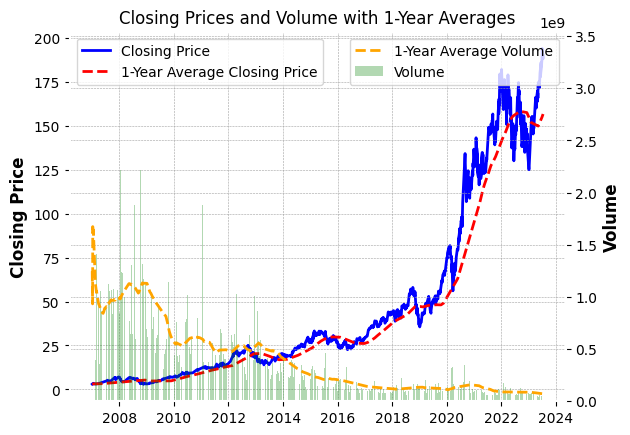

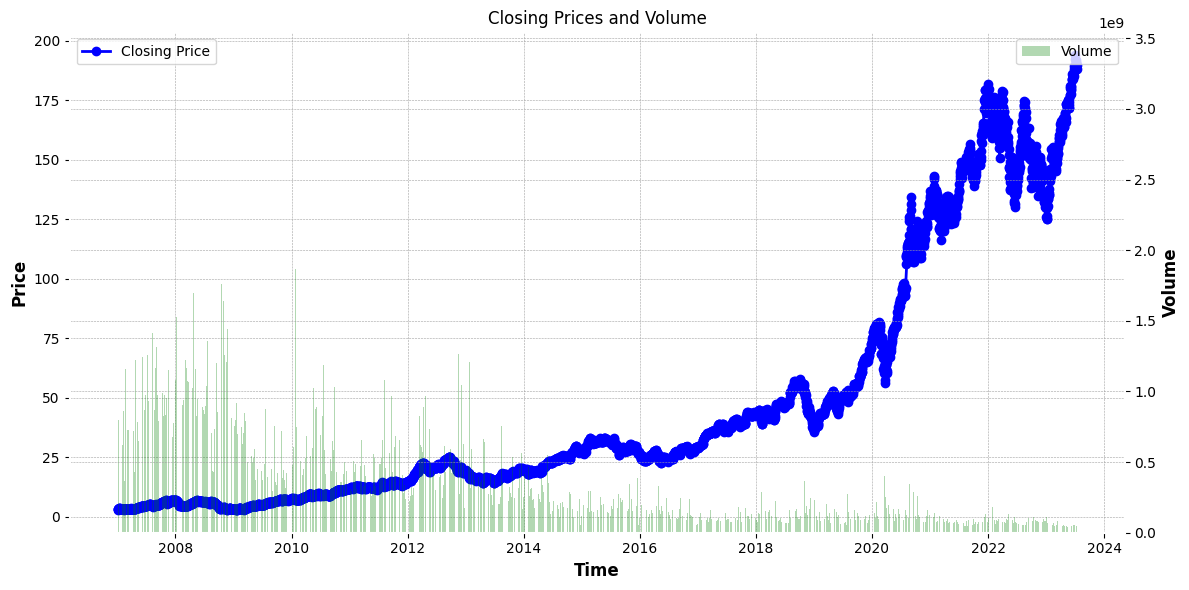

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


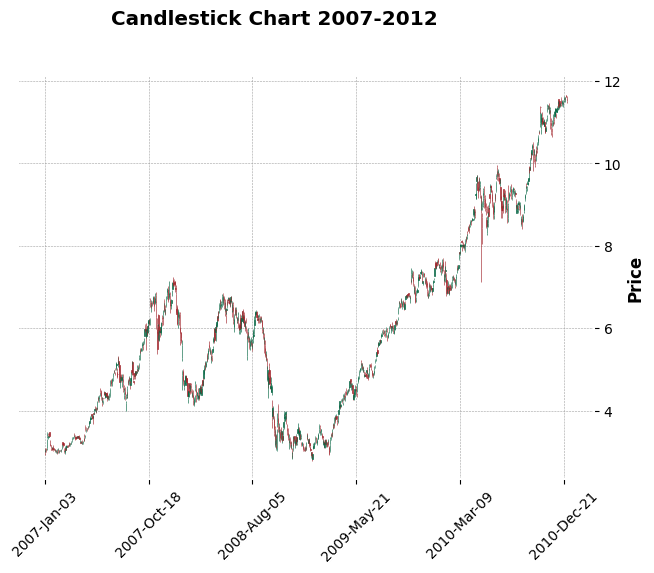

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


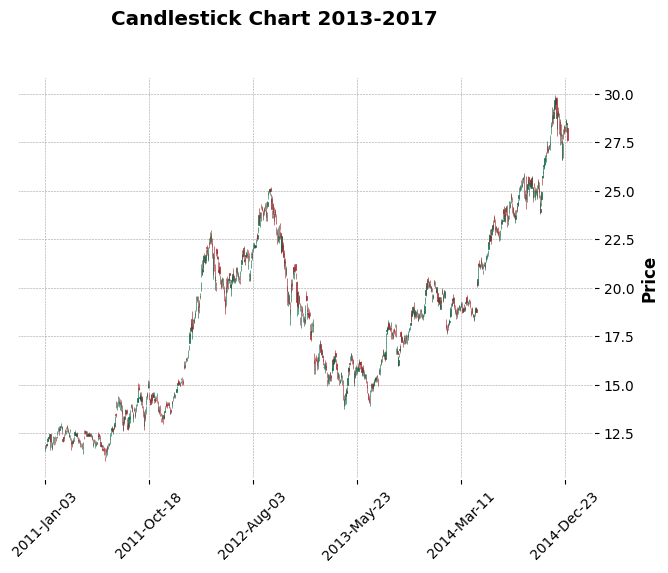

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


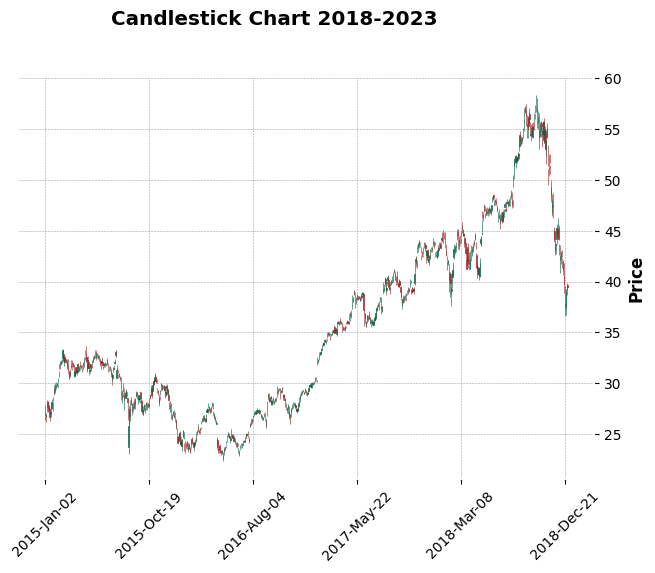

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


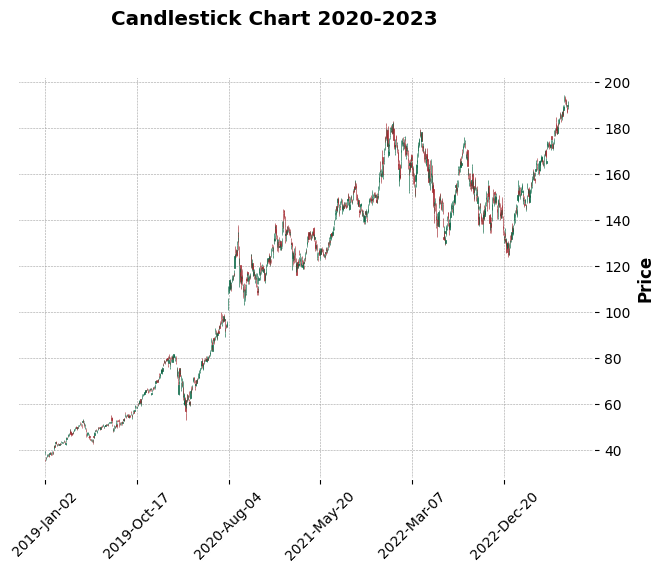

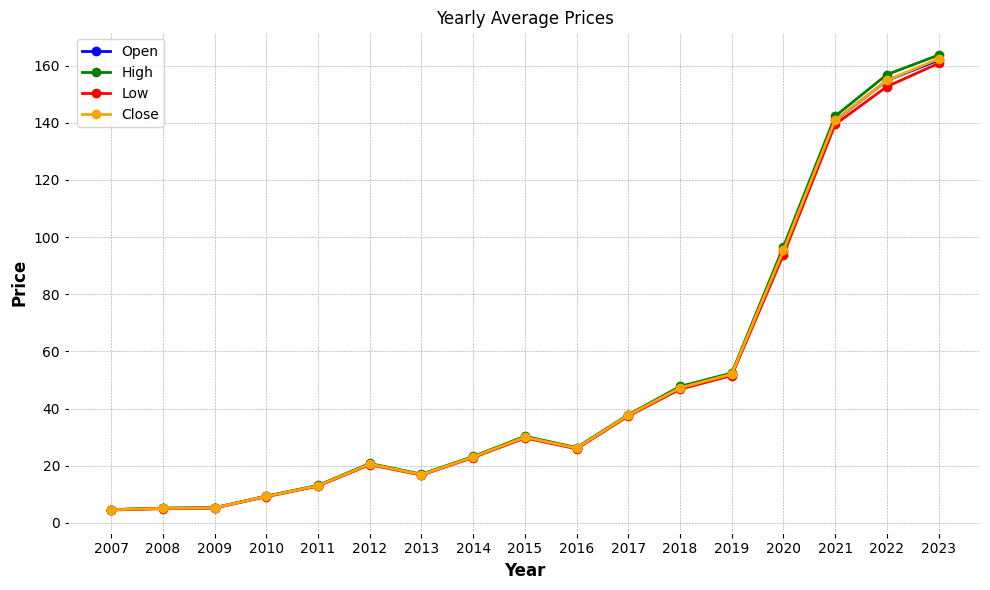

In [49]:
#Data Visualization
df['close_1yr_avg'] = df['close'].rolling(window='365D').mean()
df['volume_1yr_avg'] = df['volume'].rolling(window='365D').mean()
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['close'], color='blue', label='Closing Price')
ax1.plot(df.index, df['close_1yr_avg'], color='red', linestyle='--', label='1-Year Average Closing Price')
ax1.set_ylabel('Closing Price')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.bar(df.index, df['volume'], color='green', alpha=0.3, label='Volume')
ax2.plot(df.index, df['volume_1yr_avg'], color='orange', linestyle='--', label='1-Year Average Volume')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')
plt.title('Closing Prices and Volume with 1-Year Averages')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], marker='o', linestyle='-', color='b', label='Closing Price')
plt.title('Closing Prices and Volume')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.twinx()
plt.bar(df.index, df['volume'], alpha=0.3, color='g', label='Volume')
plt.ylabel('Volume')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

#CandleStick chart
df_2007_2010 = df['2007':'2010']
df_2011_2014 = df['2011':'2014']
df_2015_2018 = df['2015':'2018']
df_2019_2023 = df['2019':'2023']
mpf.plot(df_2007_2010, type='candle', style='charles', title='Candlestick Chart 2007-2012', ylabel='Price')
mpf.plot(df_2011_2014, type='candle', style='charles', title='Candlestick Chart 2013-2017', ylabel='Price')
mpf.plot(df_2015_2018, type='candle', style='charles', title='Candlestick Chart 2018-2023', ylabel='Price')
mpf.plot(df_2019_2023, type='candle', style='charles', title='Candlestick Chart 2020-2023', ylabel='Price')
plt.show()

df['year'] = df.index.year
yearly_averages = df.groupby('year').agg({
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.title('Yearly Average Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(yearly_averages['year'])
plt.plot(yearly_averages['year'], yearly_averages['open'], marker='o', linestyle='-', color='blue', label='Open')
plt.plot(yearly_averages['year'], yearly_averages['high'], marker='o', linestyle='-', color='green', label='High')
plt.plot(yearly_averages['year'], yearly_averages['low'], marker='o', linestyle='-', color='red', label='Low')
plt.plot(yearly_averages['year'], yearly_averages['close'], marker='o', linestyle='-', color='orange', label='Close')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Statistics by Year:
       volume_mean  volume_median    volume_std   open_mean  open_median  \
year                                                                       
2007  9.854333e+08   8.997300e+08  4.233823e+08    4.585554      4.42710   
2008  1.130935e+09   1.042174e+09  4.550622e+08    5.082639      5.28790   
2009  5.689824e+08   5.186561e+08  2.145813e+08    5.236404      5.07695   
2010  5.990311e+08   5.500505e+08  2.605787e+08    9.284238      9.17625   
2011  4.922560e+08   4.403298e+08  2.185052e+08   13.002193     12.76140   
2012  5.278878e+08   4.875142e+08  2.317693e+08   20.594736     20.75965   
2013  4.064722e+08   3.590918e+08  1.770575e+08   16.897428     16.46610   
2014  2.527564e+08   2.288510e+08  1.179631e+08   23.054943     23.48815   
2015  2.072952e+08   1.893435e+08  8.454144e+07   30.042382     30.12000   
2016  1.536688e+08   1.349625e+08  6.849900e+07   26.126925     26.37375   
2017  1.085037e+08   9.744594e+07  4.511257e+07   37.612713     38.1

<ipython-input-54-d8c80c2f7a4d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['close_ma'] = df_year['close'].rolling(window=window).mean()
<ipython-input-54-d8c80c2f7a4d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['close_ma'] = df_year['close'].rolling(window=window).mean()
<ipython-input-54-d8c80c2f7a4d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

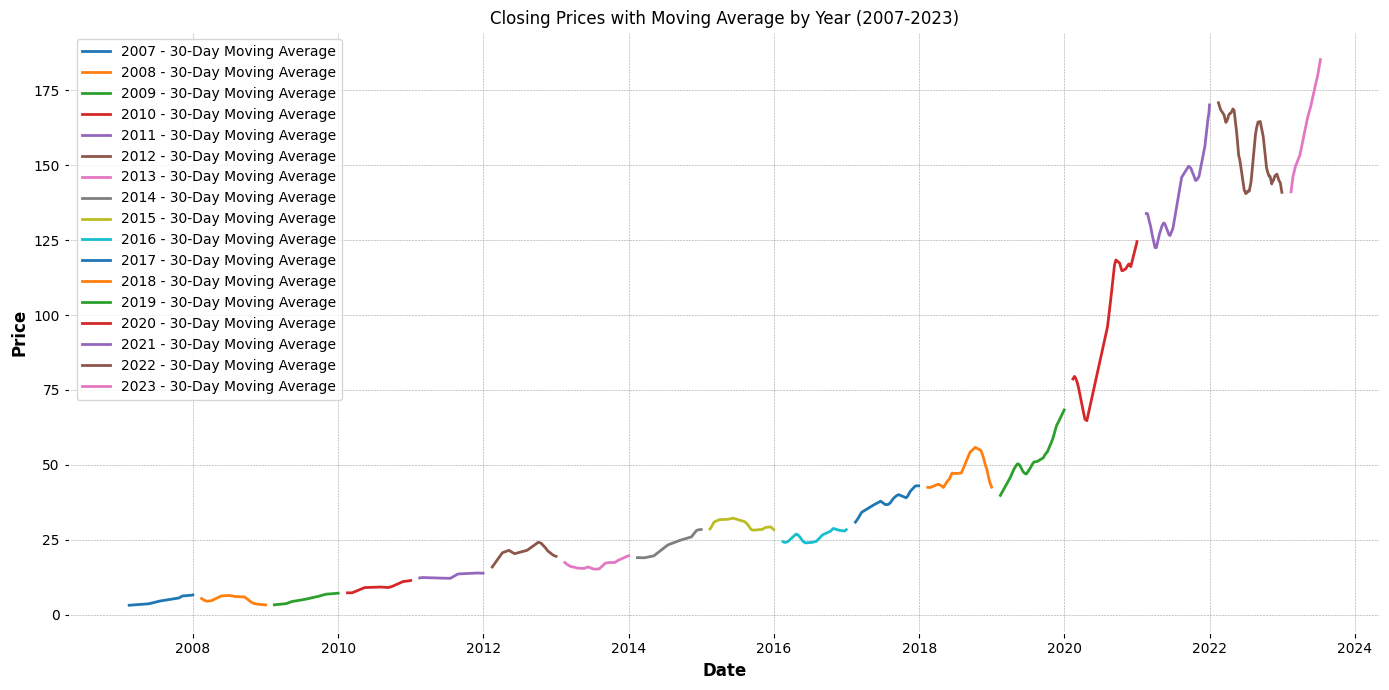

In [54]:
#Statistical Analysis
stats_by_year = df.groupby('year').agg({
    'volume': ['mean', 'median', 'std'],
    'open': ['mean', 'median', 'std'],
    'close': ['mean', 'median', 'std'],
    'high': ['mean', 'median', 'std'],
    'low': ['mean', 'median', 'std'],
})

stats_by_year.columns = ['_'.join(col).strip() for col in stats_by_year.columns.values]

print("Statistics by Year:")
print(stats_by_year)





# Calculate moving average for each year from 2007 to 2023
years = range(2007, 2024)
plt.figure(figsize=(14, 7))
for year in years:
    df_year = df[df.index.year == year]
    window = 30
    df_year['close_ma'] = df_year['close'].rolling(window=window).mean()
    plt.plot(df_year.index, df_year['close_ma'], label=f'{year} - {window}-Day Moving Average')
plt.title('Closing Prices with Moving Average by Year (2007-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Average Closing Prices by Year:
year
2007      4.581222
2008      5.070867
2009      5.243364
2010      9.280176
2011     13.000154
2012     20.573207
2013     16.879816
2014     23.066142
2015     30.009967
2016     26.151002
2017     37.637764
2018     47.263357
2019     52.063983
2020     95.346759
2021    140.989325
2022    154.835060
2023    162.474999
Name: close, dtype: float64
T-test results for average closing prices between 2010 and 2020:
T-statistic: -62.52669128864179
P-value: 2.4048932928121175e-239
                      close  daily_return
time                                     
2007-01-04 05:00:00  3.0593      0.022186
2007-01-05 05:00:00  3.0375     -0.007126
2007-01-08 05:00:00  3.0525      0.004938
2007-01-09 05:00:00  3.3061      0.083079
2007-01-10 05:00:00  3.4643      0.047851


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   2.,   1.,   1.,   4.,   1.,  11.,   9.,  20.,  23.,  42.,
         55.,  95., 179., 257., 408., 726., 721., 567., 423., 238., 145.,
         90.,  50.,  29.,  10.,  15.,  10.,   5.,   3.,   4.,   4.,   1.,
          2.,   0.,   1.,   1.,   0.,   1.]),
 array([-0.17919214, -0.17282677, -0.16646141, -0.16009605, -0.15373068,
        -0.14736532, -0.14099995, -0.13463459, -0.12826922, -0.12190386,
        -0.11553849, -0.10917313, -0.10280776, -0.0964424 , -0.09007703,
        -0.08371167, -0.0773463 , -0.07098094, -0.06461557, -0.05825021,
        -0.05188484, -0.04551948, -0.03915411, -0.03278875, -0.02642338,
        -0.02005802, -0.01369265, -0.00732729, -0.00096192,  0.00540344,
         0.01176881,  0.01813417,  0.02449954,  0.0308649 ,  0.03723027,
         0.04359563,  0.049961  ,  0.05632636,  0.06269173,  0.06905709,
         0.07542246,  0.08178782,  0.08815319,  0.09451855,  0.10088391,
 

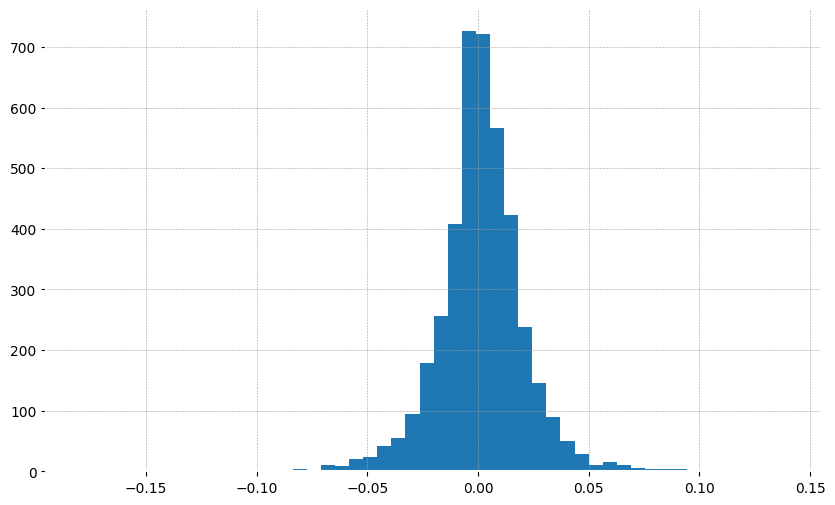

In [72]:
#Hypothesis Testing
average_closing_prices = df.groupby('time')['close'].mean().reset_index()
average_closing_prices['year'] = average_closing_prices['time'].dt.year
average_closing_prices = average_closing_prices.groupby('year')['close'].mean()
print("Average Closing Prices by Year:")
print(average_closing_prices)


df['year'] = df.index.year
year_2010 = df[df['year'] == 2010]['close']
year_2020 = df[df['year'] == 2020]['close']
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(year_2010, year_2020)
print(f"T-test results for average closing prices between 2010 and 2020:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

df.index = pd.to_datetime(df.index)
df['daily_return'] = df['close'].pct_change()
df.dropna(inplace=True)
print(df[['close', 'daily_return']].head())
plt.figure(figsize=(10, 6))
plt.hist(df['daily_return'], bins=50)

In [75]:
#BONUS: Advanced Statistical Techniques
    #Signal Processing using SciPy
    #Statistical Functions in NumPy
window1 = 50
window2 = 200
df['close_ma_50'] = df['close'].rolling(window=window1).mean()
df['close_ma_200'] = df['close'].rolling(window=window2).mean()
df['volume_ma_50'] = df['volume'].rolling(window=window1).mean()
df['volume_ma_200'] = df['volume'].rolling(window=window2).mean()
print(df[['close', 'close_ma_50', 'close_ma_200', 'volume', 'volume_ma_50', 'volume_ma_200']].head())
corr_close_ma_50_volume_ma_50 = np.corrcoef(df['close_ma_50'], df['volume_ma_50'])[0, 1]
corr_close_ma_50_volume_ma_200 = np.corrcoef(df['close_ma_50'], df['volume_ma_200'])[0, 1]
corr_close_ma_200_volume_ma_50 = np.corrcoef(df['close_ma_200'], df['volume_ma_50'])[0, 1]
corr_close_ma_200_volume_ma_200 = np.corrcoef(df['close_ma_200'], df['volume_ma_200'])[0, 1]
print(f"Correlation between 50-day MA of Closing Price and 50-day MA of Volume: {corr_close_ma_50_volume_ma_50}")
print(f"Correlation between 50-day MA of Closing Price and 200-day MA of Volume: {corr_close_ma_50_volume_ma_200}")
print(f"Correlation between 200-day MA of Closing Price and 50-day MA of Volume: {corr_close_ma_200_volume_ma_50}")
print(f"Correlation between 200-day MA of Closing Price and 200-day MA of Volume: {corr_close_ma_200_volume_ma_200}")


                      close  close_ma_50  close_ma_200        volume  \
time                                                                   
2007-10-18 04:00:00  6.1964          NaN           NaN  8.242661e+08   
2007-10-19 04:00:00  6.0864          NaN           NaN  1.291553e+09   
2007-10-22 04:00:00  6.2271          NaN           NaN  1.649497e+09   
2007-10-23 04:00:00  6.6486          NaN           NaN  1.794793e+09   
2007-10-24 04:00:00  6.6404          NaN           NaN  1.288480e+09   

                     volume_ma_50  volume_ma_200  
time                                              
2007-10-18 04:00:00           NaN            NaN  
2007-10-19 04:00:00           NaN            NaN  
2007-10-22 04:00:00           NaN            NaN  
2007-10-23 04:00:00           NaN            NaN  
2007-10-24 04:00:00           NaN            NaN  
Correlation between 50-day MA of Closing Price and 50-day MA of Volume: nan
Correlation between 50-day MA of Closing Price and 200-day MA 

Summary and Insights

Analysis of Apple Stock (2007-2023):

Apple's stock has changed a lot over the years. Let's look at some key numbers to understand how it has performed.

Trading Activity:

The amount of Apple stock traded each day has gone up and down. In 2008, it was traded a lot—over a billion shares some days. By 2023, it was much less—about 62 million shares a day. This shows how active investors have been in buying and selling Apple stock.

Stock Prices:

The price of Apple stock has gone up significantly over time. In 2007, the price started around 4.59 when the market opened. By 2023, it was around 161.99. These are average prices, but even the typical (median) prices have gone up a lot. Prices also moved a bit up and down, showing that Apple's stock price can change quickly sometimes.

Relationships Between Prices and Trading:

When more Apple stock is traded (higher volume), it often means the stock's price is changing a lot too. This happens when many people are buying or selling Apple stock, maybe because of big news about Apple or changes in the market.

Trends in Recent Years:

From 2010 to 2020, the average price people paid for Apple stock went up a lot. This shows how Apple has become more valuable over the years. When we compared the average prices of Apple stock during these years, the differences were very clear.

How Apple's Stock Moves Each Day:

Looking at how much Apple's stock changes in value each day, it looks like it follows a normal pattern. This means most days, the changes in Apple's stock price are like many other companies' stocks. It helps investors understand the risks and opportunities of owning Apple stock.

Conclusion:

Apple's stock has grown a lot since 2007. Understanding how much it's traded, how its price changes, and how it compares to other stocks can help people decide if they want to invest in Apple. This information also shows how Apple has become one of the most valuable companies in the world.

#Reflection

1. Growth in Trading Activity: The volume of Apple stock traded daily fluctuated significantly over the years, peaking in 2008 and tapering off by 2023. This reflects varying levels of investor interest and market conditions over time.

2. Steady Increase in Stock Prices: Both average and median stock prices for Apple showed a steady upward trend from 2007 to 2023. This indicates that Apple's stock has consistently appreciated in value over the years, making it a valuable asset for investors.

3. Relationship Between Prices and Trading Volume: Higher trading volumes often coincided with more significant price movements in Apple's stock. This suggests that periods of high trading activity correlate with increased volatility and investor interest in the company.

4. Long-Term Price Trends: The comparison of average closing prices between 2010 and 2020 revealed a substantial increase, highlighting Apple's robust growth and market performance during this period.

5. Daily Stock Movements: Analyzing daily returns indicated that Apple's stock price changes followed a pattern similar to many other stocks, adhering to a normal distribution. This characteristic helps investors gauge the typical volatility and risk associated with holding Apple stock.

6. Overall Impression: The data paints a picture of Apple as a resilient and consistently growing entity in the stock market. Its ability to maintain steady price appreciation amidst varying market conditions underscores its status as a prominent investment choice globally.